In [1]:
import pandas as pd

colunas = ['PROCESSO', 'ROTULO_MANUAL', 'LEI']

df = pd.read_csv('../data/leis.csv', header=0, sep=',', quotechar='"', usecols=colunas)

In [2]:
 df.head()

,PROCESSO,ROTULO_MANUAL,LEI
0,00039604720138240039,CDC,9656/1998
1,00039604720138240039,CDC,616/2012
2,00039604720138240039,CDC,9656/1998
3,00039604720138240039,CDC,616/2012
4,00039604720138240039,CDC,9656/1998


Utitiza apenas label que contenham mais de 200 exemplos.

In [3]:
df.loc[df.ROTULO_MANUAL in [], 'ROTULO_MANUAL'] = 'NONE'

groupby_rotulo = df.groupby('ROTULO_MANUAL')

groupby_rotulo[['LEI']].count().sort_values(['LEI'], ascending=False)

,LEI
ROTULO_MANUAL,
EXP,905
SEG,803
OIG,694
BAN,654
BUS,334
FAL,261
CON,257
SFH,210
CDC,186


In [4]:
df.shape

(5197, 3)

In [5]:
data = df.groupby(['PROCESSO', 'ROTULO_MANUAL', 'LEI']).size().unstack('LEI', fill_value=0)
data = data.reset_index()

data.head()

LEI,PROCESSO,ROTULO_MANUAL,1/1975,1/2012,100/2015,101/2010,10144/2002,10150/2000,1025/2009,10257/2001,...,9610/1998,9611/1998,9612/1998,9615/1998,9656/1988,9656/1997,9656/1998,9658/1998,9800/1999,9870/1999
0,00000042920148240058,CON,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00000057320168240242,INF,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,00000110319958240053,TIT,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,00000186020108240023,AUT,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
4,00000224520138240071,OIG,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y = data['ROTULO_MANUAL'].values
y.shape

(1220,)

In [7]:
df1 = data.iloc[:,2:].copy()
df1.head()

LEI,1/1975,1/2012,100/2015,101/2010,10144/2002,10150/2000,1025/2009,10257/2001,104/1990,1060/1950,...,9610/1998,9611/1998,9612/1998,9615/1998,9656/1988,9656/1997,9656/1998,9658/1998,9800/1999,9870/1999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
x = df1.values
x.shape

(1220, 255)

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

import collections

print(collections.Counter(y_train))
print(collections.Counter(y_test))

Counter({'OIG': 145, 'SEG': 144, 'BAN': 129, 'EXP': 90, 'BUS': 59, 'CON': 49, 'SFH': 39, 'CDC': 37, 'RAI': 37, 'DAN': 25, 'DPV': 25, 'TIT': 24, 'FAL': 19, 'OIE': 17, 'COM': 17, 'FAM': 13, 'DMI': 10, 'PRE': 10, 'AUT': 8, 'MAR': 6, 'SUC': 3, 'SOC': 2, 'INF': 2, 'CIV': 2, 'REG': 1, 'RESCO': 1, 'POS': 1})
Counter({'SEG': 56, 'OIG': 53, 'BAN': 35, 'CON': 24, 'BUS': 19, 'EXP': 18, 'CDC': 15, 'RAI': 11, 'DPV': 10, 'SFH': 10, 'DAN': 8, 'FAL': 8, 'PRE': 8, 'TIT': 8, 'OIE': 5, 'COM': 4, 'DMI': 3, 'SOC': 3, 'FAM': 2, 'POS': 2, 'RESCO': 2, 'AUT': 1})


In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier

#enc = OneHotEncoder(handle_unknown='ignore')
clf = DecisionTreeClassifier()

text_clf = Pipeline([
    #('enc', enc),
    ('clf', clf)
])

text_clf.fit(x , y)

Pipeline(memory=None,
     steps=[('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

Testando o modelo.

In [11]:
y_pred = text_clf.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8885245901639345

In [12]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         AUT       1.00      1.00      1.00         1
         BAN       0.82      0.89      0.85        35
         BUS       1.00      0.89      0.94        19
         CDC       0.82      0.93      0.87        15
         COM       1.00      0.75      0.86         4
         CON       0.89      0.67      0.76        24
         DAN       0.70      0.88      0.78         8
         DMI       1.00      0.67      0.80         3
         DPV       1.00      1.00      1.00        10
         EXP       0.95      1.00      0.97        18
         FAL       0.67      0.75      0.71         8
         FAM       0.50      0.50      0.50         2
         MAR       0.00      0.00      0.00         0
         OIE       0.67      0.40      0.50         5
         OIG       0.93      0.98      0.95        53
         POS       0.00      0.00      0.00         2
         PRE       1.00      0.88      0.93         8
         RAI       0.64    

/home/piantino/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/piantino/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [13]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)

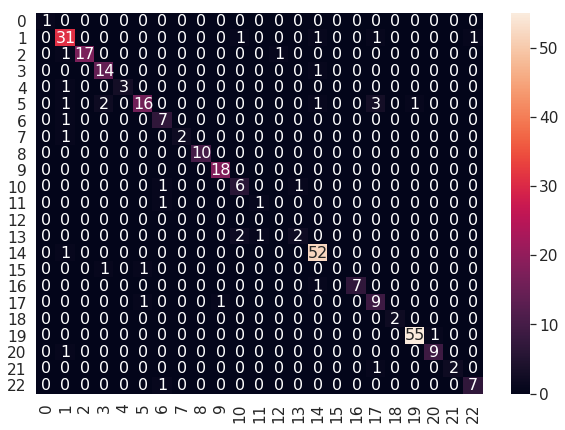

In [19]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

      
df_cm = pd.DataFrame(cnf_matrix, range(23), range(23))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})

In [15]:
features = list(data.columns.values)
del features[0:2]

len(features)

255

In [16]:
df_sample = pd.DataFrame(columns=features)
df_sample = df_sample.append({'9656/1998': 1}, ignore_index=True)
df_sample = df_sample.fillna(0)

df_sample

,1/1975,1/2012,100/2015,101/2010,10144/2002,10150/2000,1025/2009,10257/2001,104/1990,1060/1950,...,9610/1998,9611/1998,9612/1998,9615/1998,9656/1988,9656/1997,9656/1998,9658/1998,9800/1999,9870/1999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
y_pred = text_clf.predict(df_sample)

y_pred

array(['CDC'], dtype=object)

In [18]:
from sklearn.externals import joblib

joblib.dump(features, '../modelos/Features-Leis.pkl', compress = 1)
joblib.dump(clf, '../modelos/Modelo-Leis.pkl', compress = 1) 

['../modelos/Modelo-Leis.pkl']